# data_structures

> Fill in a module description here

In [1]:
#| default_exp data_structures

In [2]:
#| hide
from nbdev.showdoc import *
from fastcore.test import *

In [3]:
from collections import deque
import matplotlib.pyplot as plt
import networkx as nx

## Utility functions

In [4]:
def visualize_tree(root):
    if not root:
        print("Empty tree")
        return
    
    G = nx.DiGraph()
    pos = {}
    labels = {}
    node_id = 0
    
    def add_nodes(node, x=0.0, y=0.0, layer=1):
        nonlocal node_id
        if node:
            current_id = node_id
            node_id += 1
            G.add_node(current_id)
            pos[current_id] = (x, y)
            labels[current_id] = str(node.value)
            
            if node.left:
                left_id = node_id
                G.add_edge(current_id, left_id)
                add_nodes(node.left, x - 1/layer, y - 1, layer + 1)
            if node.right:
                right_id = node_id
                G.add_edge(current_id, right_id)
                add_nodes(node.right, x + 1/layer, y - 1, layer + 1)
            
            return current_id
    
    add_nodes(root)
    
    plt.figure(figsize=(3, 2))
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='lightblue', 
            node_size=1000, font_size=16, font_weight='bold', arrows=True)
    plt.title("Binary Tree Visualization")
    plt.show()

## Binary Trees

> Classes and methods for operating with Binary Search Trees.

A Binary Search Tree is a hierarchical data structure compose of nodes, where each node has at most two child nodes.
Binary Trees are used for efficient data storage and support insertions, deletions, and traversals. These operations have a worst-case complexity of O(n). Balanced trees have a time complexity of O(logn).

![The Anatomy of a Binary Tree](https://media.geeksforgeeks.org/wp-content/uploads/20240811023816/Introduction-to-Binary-Tree.webp)


Each node in a binary tree has three parts:
- Data
- Pointer to the left child
- Pointer to the right child

![Figure of a node](https://media.geeksforgeeks.org/wp-content/uploads/20240811023858/Binary-Tree-Representation.webp)

Creating a Node

In [5]:
class Node:
    """A node in a binary tree."""
    def __init__(self, key, left: "Node|None"=None, right: "Node|None"=None):
        self.value = key
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, and right children."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        return f"Node({self.value}, left={left_value}, right={right_value})"

    def __repr__(self) -> str:
        """A representation of the node including its value, left, and right children."""
        return self.__str__()

Creating a binary tree requires creating a set of nodes.

In [6]:
node1 = Node(1)
node1

Node(1, left=None, right=None)

In [7]:
root_node = (
    Node(1,
        Node(2,
                Node(4,
                    Node(8),
                    Node(9)
                ),
                Node(5,
                    Node(10),
                    Node(11)
                )
        ),
        Node(3,
                Node(6,
                    Node(12),
                    Node(13)
                ),
                Node(7,
                    Node(14),
                    Node(15)
                )
        )
    )
)
root_node

Node(1, left=Node(2), right=Node(3))

Terminology:

- Node: an object with a value, a left node, and a child node.
- Child: a left or right node.
- Parent: a node that has a child node.
- Root: the topmost node in a set of nodes; it does not have a parent.
- Leaf: a node with a parent node and no child nodes.
- Internal: a node with at least one child node.
- Depth: the number of edges from a node to its root.
- Height: the Depth of the deepest leaf node.

In [8]:
class Node:
    """A node in a binary tree."""
    def __init__(self, key, left: "Node|None"=None, right: "Node|None"=None, parent: "Node|None" = None):
        self.value = key
        self.parent: Node|None = parent
        self.left: Node|None = left
        self.right: Node|None = right
    
    def __str__(self) -> str:
        """A string representation of the node including its value, left, and right children."""
        left_value = f"Node({self.left.value})" if self.left else None
        right_value = f"Node({self.right.value})" if self.right else None
        parent_value = f"Node({self.parent.value})" if self.parent else None
        return f"Node({self.value}, left={left_value}, right={right_value}, parent={parent_value})"

    def __repr__(self) -> str:
        """A representation of the node including its value, left, and right children."""
        return self.__str__()

    @property
    def height(self) -> int:
        return 1 + max(
            (self.left.height if self.left else 0), (self.right.height if self.right else 0)
        )
    
    @property
    def depth(self) -> int:
        return 1 + (self.parent.depth if self.parent else 0)


In [9]:
def set_parents(node: Node, parent: Node|None=None) -> Node:
    """Set parent nodes given a root node."""
    if parent:
        node.parent = parent
    if node.left:
        set_parents(node.left, node)
    if node.right:
        set_parents(node.right, node)
    return node

In [10]:
root_node = set_parents(
    Node(1,
        Node(2,
                Node(4,
                    Node(8),
                    Node(9)
                ),
                Node(5,
                    Node(10),
                    Node(11)
                )
        ),
        Node(3,
                Node(6,
                    Node(12),
                    Node(13)
                ),
                Node(7,
                    Node(14),
                    Node(15)
                )
        )
    )
)
root_node.parent, root_node.height, root_node.depth


(None, 4, 1)

In [11]:
if root_node.left:
    print(root_node.left, "depth:", root_node.left.depth)

Node(2, left=Node(4), right=Node(5), parent=Node(1)) depth: 2


Properties of a binary tree:

- Max nodes: $2^H - 1$
- Max nodes in a level: $2^L$
- Min height is $log_2(n+1)$

## Operations on a binary tree

- Traversal:
  - Visiting all nodes in a binary tree.
  - Depth-First Search:
    - preorder
    - inorder
    - postorder
  - Breadth-First Search:
    - level
- Insertion
- Deletion

### Traversal

Empty tree


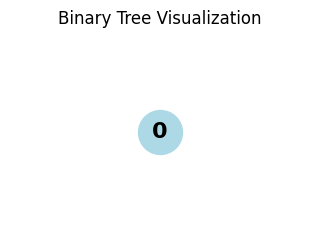

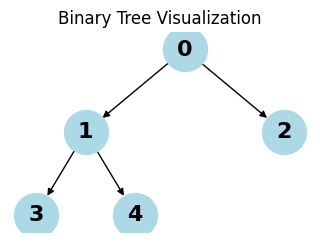

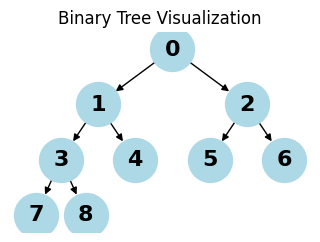

In [12]:
from collections import deque

def _create_dummy_node(num=5) -> Node:
    if num <= 0:
        return None
    nodes = [Node(i) for i in range(num)]
    for i in range(num):
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < num:
            nodes[i].left = nodes[left_index]
            nodes[left_index].parent = nodes[i]
        if right_index < num:
            nodes[i].right = nodes[right_index]
            nodes[right_index].parent = nodes[i]
    return nodes[0]  # root node

visualize_tree(_create_dummy_node(0))
visualize_tree(_create_dummy_node(1))
visualize_tree(_create_dummy_node(5))
visualize_tree(_create_dummy_node(9))

#### DFS

> Implemented using recursion

In [13]:
root = _create_dummy_node()

In [14]:
from typing import Generator


def dfs_inorder(node: Node) -> Generator[Node, None, None]:
    """Depth-first search.
    
    Visits left subtree, then node, then right subtree
    """
    if node.left:
        yield from dfs_inorder(node.left)
    yield node
    if node.right:
        yield from dfs_inorder(node.right)

list(dfs_inorder(root))

[Node(3, left=None, right=None, parent=Node(1)),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(0, left=Node(1), right=Node(2), parent=None),
 Node(2, left=None, right=None, parent=Node(0))]

In [15]:
def dfs_preorder(node: Node) -> Generator[Node, None, None]:
    """Depth-first search.

    Visits the node, then left subtree, then right subtree.
    """
    yield node
    if node.left:
        yield from dfs_preorder(node.left)
    if node.right:
        yield from dfs_preorder(node.right)
list(dfs_preorder(root))

[Node(0, left=Node(1), right=Node(2), parent=None),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(2, left=None, right=None, parent=Node(0))]

In [16]:
def dfs_postorder(node: Node) -> Generator[Node, None, None]:
    """Depth-first search.

    Visits the left subtree, then right subtree, then the node
    """
    if node.left:
        yield from dfs_postorder(node.left)
    if node.right:
        yield from dfs_postorder(node.right)
    yield node
list(dfs_postorder(root))

[Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1)),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(2, left=None, right=None, parent=Node(0)),
 Node(0, left=Node(1), right=Node(2), parent=None)]

#### BFS

> Implemented using a queue

In [17]:
from collections import deque
def bfs(node: Node) -> Generator[Node, None, None]:
    """Breadth-first search."""
    queue = deque([node])
    while queue:
        node = queue.popleft()
        yield node
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)
list(bfs(root))

[Node(0, left=Node(1), right=Node(2), parent=None),
 Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(2, left=None, right=None, parent=Node(0)),
 Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1))]

### Insertion

Insertion uses BFS to find the first child node without a child.

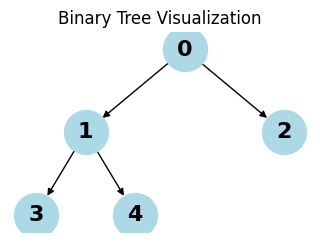

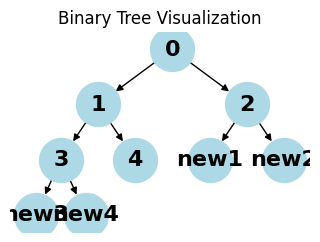

In [18]:
def insert_node(root: Node, key):
    """"""
    queue = deque([root])
    while queue:
        node = queue.popleft()
        if node.left:
            queue.append(node.left)
        else:
            node.left = Node(key=key, left=None, right=None, parent=node)
            break

        if node.right:
            queue.append(node.right)
        else:
            node.right = Node(key=key, left=None, right=None, parent=node)
            break
    
root = _create_dummy_node()
visualize_tree(root)
insert_node(root, "new1")
insert_node(root, "new2")
insert_node(root, "new3")
insert_node(root, "new4")
visualize_tree(root)

### Search

In [19]:
from typing import Callable


def search_tree(root: Node, key, traversal_func: Callable[[Node], Generator[Node, None, None]]) -> Node|None:
    for node in traversal_func(root):
        if node.value == key:
            return node
    else:
        return None

root = _create_dummy_node()
(
    search_tree(root, 1, dfs_inorder),
    search_tree(root, 2, dfs_preorder),
    search_tree(root, 3, dfs_postorder),
    search_tree(root, 4, bfs),
    search_tree(root, 5, dfs_inorder),
)

(Node(1, left=Node(3), right=Node(4), parent=Node(0)),
 Node(2, left=None, right=None, parent=Node(0)),
 Node(3, left=None, right=None, parent=Node(1)),
 Node(4, left=None, right=None, parent=Node(1)),
 None)

### Deletion

Deleting a node requires choosing a traversal method, finding the node to delete, then promoting another node to the level of the parent node to preserve the tree's structure. The simplest solution is to replace the deleted node with the right-most node in the tree. If the node to delete is the right-most node, just delete it.

The first step is to identify the right-most node, then compare it with the node to delete, then delete the node and swap it with the right-most node.

> Note: any node can be swapped to preserve the tree structure, but if you want to maintain order of a BST, you need to choose the node that will preserve BST constraints.

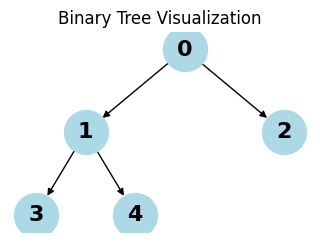

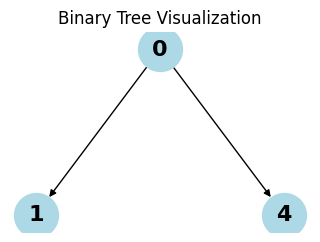

Empty tree


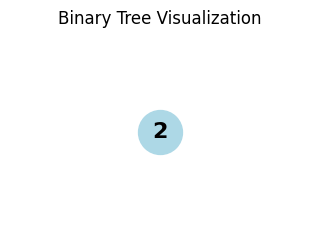

In [20]:
def delete_node(root: Node, key=None) -> Node|None:
    """Uses BFS to delete the node with a key and swap it with the right-most node."""

    # if root has no children
    if root.left or root.right:
        pass
    else:
        del root
        return None

    # find the deepest root node and its parent
    queue: deque[tuple[Node, Node|None]] = deque([(root, None)])  # root has no parent
    last_parent = None
    last_node = None
    while queue:
        last_node, last_parent = queue.popleft()
        if last_node.left:
            queue.append((last_node.left, last_node))
        if last_node.right:
            queue.append((last_node.right, last_node))

    # delete the leaf node
    if last_parent:
        if last_parent.right:
            last_parent.right = None
        elif last_parent.left:
            last_parent.left = None
    else:
        raise NotImplementedError("Parent of right-most node not found.")
    
    # find the node with value == key
    if last_node and root.value == key:
        last_node.left = root.left
        last_node.right = root.right
        del root
        return last_node
    elif last_node:
        pass
    else:
        raise NotImplementedError

    target_queue: deque[Node] = deque([root])
    while target_queue:
        node = target_queue.popleft()
        if node.left:
            if node.left is last_node:
                node.left = None
                return root
            elif node.left.value == key:
                node.left = last_node
                last_node.parent = node
                return root
            target_queue.append(node.left)
        if node.right:
            if node.right is last_node:
                node.right = None
                return root
            elif node.right.value == key:
                node.right = last_node
                last_node.parent = node
                return root
            target_queue.append(node.right)
    return root

visualize_tree(_create_dummy_node())
visualize_tree(
    delete_node(
        delete_node(
            _create_dummy_node(),
            2
        ),  # type: ignore
        5
    )
)
visualize_tree(
    delete_node(Node(1), 1)
)
visualize_tree(
    delete_node(Node(1, left=Node(2)), 1)
)
      

## Types of binary trees

- By children
  - Full
  - Degenerate
  - Skewed
- By levels
  - Complete
  - Perfect
  - Balanced
- By values
  - Binary search tree
  - AVL
  - Red Black
  - B
  - B+
  - Segment

In [21]:
#| hide
import nbdev; nbdev.nbdev_export()